<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "AE_MNIST_Simetrico"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)                       │ (None, 28, 28, 1)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ enc_conv1 (Conv2D)                             │ (None, 28, 28, 32)                  │                 288 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ leaky_re_lu_12 (LeakyReLU)                     │ (None, 28, 28, 32)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ enc_pool1 (MaxPooling2D)                       │ (None, 14, 14, 32)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ enc_conv2 (Conv2D)                             │ (None, 14, 14, 64)                  │              18,432 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ leaky_re_lu_13 (LeakyReLU)                     │ (None, 14, 14, 64)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ enc_pool2 (MaxPooling2D)                       │ (None, 7, 7, 64)                    │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ enc_conv3_bottleneck (Conv2D)                  │ (None, 7, 7, 128)                   │              73,728 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ leaky_re_lu_14 (LeakyReLU)                     │ (None, 7, 7, 128)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dec_tconv1 (Conv2DTranspose)                   │ (None, 7, 7, 64)                    │              73,728 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ leaky_re_lu_15 (LeakyReLU)                     │ (None, 7, 7, 64)                    │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dec_tconv2 (Conv2DTranspose)                   │ (None, 14, 14, 32)                  │              32,768 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ leaky_re_lu_16 (LeakyReLU)                     │ (None, 14, 14, 32)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dec_tconv3 (Conv2DTranspose)                   │ (None, 28, 28, 16)                  │               8,192 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ leaky_re_lu_17 (LeakyReLU)                     │ (None, 28, 28, 16)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ output_recon (Conv2D)                          │ (None, 28, 28, 1)                   │                 145 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 207,281 (809.69 KB)

 Trainable params: 207,281 (809.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
235/235 - 8s - 34ms/step - loss: 0.0409 - val_loss: 0.0158
Epoch 2/15
235/235 - 3s - 14ms/step - loss: 0.0137 - val_loss: 0.0115
Epoch 3/15
235/235 - 4s - 15ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 4/15
235/235 - 3s - 15ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 5/15
235/235 - 3s - 14ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 6/15
235/235 - 3s - 15ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 7/15
235/235 - 4s - 15ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 8/15
235/235 - 3s - 15ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 9/15
235/235 - 3s - 15ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 10/15
235/235 - 4s - 15ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 11/15
235/235 - 3s - 15ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 12/15
235/235 - 3s - 15ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 13/15
235/235 - 3s - 15ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 14/15
235/235 - 3s - 15ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 15/15
235

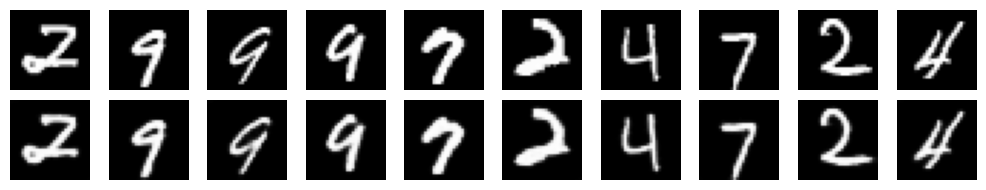

In [7]:
# AE CONVOLUCIONAL SIMÉTRICO — MNIST
#
# - Reprodutibilidade simples: semente fixa (=365) para NumPy e TensorFlow/Keras.
# - Pré-processamento fora do grafo: normalização única (x/255) em arrays x_train_norm/x_test_norm
#   → evita Rescaling no modelo e não “polui” o summary.
# - Arquitetura simétrica:
#     • ENCODER: Conv2D(32, k=3) + LeakyReLU(0.1) → MaxPool(2)  [28→14]
#                 Conv2D(64, k=3) + LeakyReLU(0.1) → MaxPool(2)  [14→7]
#                 Conv2D(128, k=3) + LeakyReLU(0.1)              [7×7 bottleneck]
#     • DECODER: Conv2DTranspose(64, k=3, s=1) + LeakyReLU(0.1)  [7→7 (refino)]
#                 Conv2DTranspose(32, k=4, s=2) + LeakyReLU(0.1) [7→14]
#                 Conv2DTranspose(16, k=4, s=2) + LeakyReLU(0.1) [14→28]
#                 Conv2D(1, k=3, sigmoid)                        [saída ∈ (0,1)]
# - Ativação: LeakyReLU com negative_slope=0.1 (passa pequeno gradiente para valores negativos,
#   reduz “neurônios mortos” e estabiliza o treino). Declarada como camada Keras para compatibilidade
#   com KerasTensors e para manter o summary focado em Conv/Pool/Transpose.
# - Inicialização: HeNormal para camadas convolucionais (coerente com ativações do tipo ReLU/LeakyReLU).
# - Função de perda: Weighted MSE (leve) — pixels de “traço” (y_true>0.1) recebem peso 5×,
#   desincentivando o colapso para fundo preto e melhorando a nitidez da reconstrução sem alterar a arquitetura.
# - Otimizador: Adam (aprendizagem adaptativa) com lr=1e-3; 15 épocas, batch_size=256.
# - Treino/validação: alimenta o modelo com dados NORMALIZADOS (x_train_norm/x_test_norm).
# - Visualização: exibe pares entrada×saída; entradas mostradas na escala original (0–255) e saídas
#   na escala do modelo (0–1), evitando dupla normalização na hora de plotar.
# - Terminologia padrão preservada: uso explícito de Conv2D e Conv2DTranspose (sem “blocos” customizados).


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import matplotlib.pyplot as plt

# --------------------------- Reprodutibilidade simples ---------------------------
np.random.seed(365)
tf.random.set_seed(365)

# --------------------------- Dados (NORMALIZAÇÃO FORA do modelo) ----------------
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., None].astype("float32")  # (N, 28, 28, 1) em [0,255]
x_test  = x_test[ ..., None].astype("float32")

# Normalização única, feita fora do modelo → valores em [0,1]
x_train_norm = x_train / 255.0
x_test_norm  = x_test  / 255.0

# --------------------------- Funções auxiliares ---------------------------
# Weighted MSE (melhoria pequena e opcional):
# - MNIST tem muito fundo preto (~0). Se o modelo previr "0" em tudo,
#   a MSE pode parecer razoável; para combater isso, damos mais peso
#   às regiões onde há traço (y_true > 0.1).
def weighted_mse(y_true, y_pred):
    w = 1.0 + 4.0 * tf.cast(y_true > 0.1, tf.float32)  # peso 5x no foreground
    return tf.reduce_mean(w * tf.square(y_true - y_pred))

# --------------------------- Modelo AE SIMÉTRICO ---------------------------
# Encoder: 28→14→7 via MaxPool2D (simetria clara) + Conv2D com LeakyReLU
# Decoder: 7→14→28 via Conv2DTranspose (upsampling aprendido) + LeakyReLU
# Observação: aplico LeakyReLU como operation (tf.nn.leaky_relu) após as convs,
#             para que o summary liste apenas Conv2D/MaxPool/Conv2DTranspose.

He = initializers.HeNormal()

inp = layers.Input((28, 28, 1), name="input_image")

# ENCODER (28→14)
x = layers.Conv2D(32, 3, strides=1, padding="same", use_bias=False,
                  kernel_initializer=He, name="enc_conv1")(inp)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.MaxPool2D(pool_size=2, strides=2, padding="same", name="enc_pool1")(x)  # 28→14

# ENCODER (14→7)
x = layers.Conv2D(64, 3, strides=1, padding="same", use_bias=False,
                  kernel_initializer=He, name="enc_conv2")(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.MaxPool2D(pool_size=2, strides=2, padding="same", name="enc_pool2")(x)  # 14→7

# Bottleneck (7x7), aumenta canais para codificar características
x = layers.Conv2D(128, 3, strides=1, padding="same", use_bias=False,
                  kernel_initializer=He, name="enc_conv3_bottleneck")(x)
z = layers.LeakyReLU(alpha=0.1)(x)

# DECODER (7→7 refinamento)
x = layers.Conv2DTranspose(64, 3, strides=1, padding="same", use_bias=False,
                           kernel_initializer=He, name="dec_tconv1")(z)  # 7→7
x = layers.LeakyReLU(alpha=0.1)(x)

# DECODER (7→14)
x = layers.Conv2DTranspose(32, 4, strides=2, padding="same", use_bias=False,
                           kernel_initializer=He, name="dec_tconv2")(x)  # 7→14
x = layers.LeakyReLU(alpha=0.1)(x)

# DECODER (14→28)
x = layers.Conv2DTranspose(16, 4, strides=2, padding="same", use_bias=False,
                           kernel_initializer=He, name="dec_tconv3")(x)  # 14→28
x = layers.LeakyReLU(alpha=0.1)(x)

# Saída final (um canal), sigmoid para manter [0,1]
out = layers.Conv2D(1, 3, padding="same", activation="sigmoid", name="output_recon")(x)

ae = models.Model(inp, out, name="AE_MNIST_Simetrico")

# --------------------------- Compilação ---------------------------
# - Otimizador: Adam (aprendizagem adaptativa) com LR um pouco maior (1e-3).
# - Perda: Weighted MSE (melhoria leve na qualidade de reconstrução sem mudar a arquitetura).
ae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
           loss=weighted_mse)

ae.summary(line_length=110)

# --------------------------- Treino ---------------------------
ae.fit(x_train_norm, x_train_norm,
       validation_data=(x_test_norm, x_test_norm),
       epochs=15, batch_size=256, verbose=2)

# --------------------------- Visualização (pares entrada×saída) ---------------------------
# Entrada: dados brutos (0–255) para exibir a imagem original como ela é.
# Para obter a reconstrução, passamos a versão normalizada ao modelo.
n = 10
idx = np.random.choice(len(x_test), size=n, replace=False)
samples_raw = x_test[idx]               # (0–255) para visualização
samples_in  = x_test_norm[idx]          # (0–1)    para inferência
recons      = ae.predict(samples_in, verbose=0)

plt.figure(figsize=(n, 2))
for i in range(n):
    # Linha 1: entradas (escala 0–255)
    ax = plt.subplot(2, n, i+1)
    plt.imshow(samples_raw[i].squeeze(), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    # Linha 2: saídas (escala 0–1)
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(recons[i].squeeze(), cmap="gray", vmin=0, vmax=1)
    plt.axis("off")
plt.tight_layout()
plt.show()